In [23]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


In [24]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

**1. Import and analyse the data set.**

Hint: 
      - 

*   Use `imdb.load_data()` method
*   Get train and test set
*   Take 10000 most frequent words

In [25]:
vocabulary_size=10000

In [26]:
(x_train, y_train), (x_test, y_test)=tensorflow.keras.datasets.imdb.load_data(num_words=vocabulary_size)

In [27]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [28]:
len(x_train)


25000

In [29]:
len(x_test)

25000

In [30]:
x_train_df=pd.DataFrame(x_train, columns = ['review'])

In [31]:
x_test_df=pd.DataFrame(x_test,columns = ['review'])

In [32]:
x_train_df['sentiment']=y_train

In [33]:
x_test_df['sentiment']=y_test

In [34]:
x_train_df.head()

,review,sentiment
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0


In [35]:
x_test_df.head()

,review,sentiment
0,"[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5,...",0
1,"[1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 267...",1
2,"[1, 111, 748, 4368, 1133, 2, 2, 4, 87, 1551, 1...",1
3,"[1, 13, 1228, 119, 14, 552, 7, 20, 190, 14, 58...",0
4,"[1, 40, 49, 85, 84, 1040, 146, 6, 783, 254, 43...",1


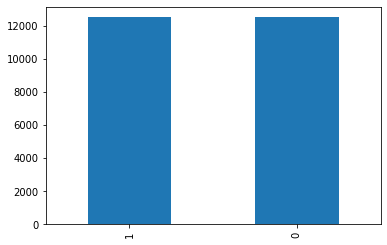

In [36]:
x_train_df['sentiment'].value_counts().plot(kind='bar')  #In traning there same number of positive and negative Sentiments

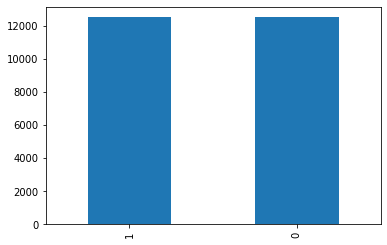

In [37]:
x_test_df['sentiment'].value_counts().plot(kind='bar')  #In Testing also there same number of positive and negative Sentiments

**2. Perform relevant sequence adding on the data**

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
max_words=80  #Tried it with 20 max_words too as the accuracy was low increased it to 80

In [40]:
x_train_pad= pad_sequences(x_train,maxlen=max_words,padding='post',truncating='post')
x_test_pad= pad_sequences(x_test,maxlen=max_words,padding='post',truncating='post')

In [41]:
len(x_train_pad[0]) 

80

In [42]:
len(x_train[0])

218

**3. Perform following data analysis:**


*   Print shape of features and labels
*   Print value of any one feature and it's label




In [43]:
print('Training reviews shape',x_train_pad.shape)

Training reviews shape (25000, 80)


In [44]:
print('Training labels shape',y_train.shape)

Training labels shape (25000,)


In [45]:
print('testing reviews shape',x_test_pad.shape)

testing reviews shape (25000, 80)


In [46]:
print('Testing labels shape',y_test.shape)

Testing labels shape (25000,)


In [47]:
print('Value of the Review Feature ',x_train_pad[0],'Sentiment Label of the corresponding review ',y_train[0])

Value of the Review Feature  [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17] Sentiment Label of the corresponding review  1


**4. Decode the feature value to get original sentence**

In [48]:
index = tensorflow.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [49]:
reverse_index = dict([(value, key) for (key, value) in index.items()])

In [87]:
decoded = " ".join( [reverse_index.get(i-3 , "#") for i in x_train_pad[0]] )
  

In [88]:
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as


5. Design, train, tune and test a sequential model.

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten,Dropout,Input, LSTM,LeakyReLU

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re

In [54]:
embedding_size=64

In [55]:
model = Sequential()
model.add(Embedding(vocabulary_size+1,embedding_size,input_length = max_words))
model.add(LSTM(128,return_sequences=True,dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(64))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [56]:

checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [57]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 64)            640064    
_________________________________________________________________
lstm (LSTM)                  (None, 80, 128)           98816     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [59]:
training_history=model.fit(x_train_pad,y_train,batch_size=64,epochs=5,validation_data=(x_test_pad, y_test), callbacks=[checkpoint])

Epoch 1/5
391/391 [==============================] - 155s 385ms/step - loss: 0.5936 - accuracy: 0.6451 - val_loss: 0.4377 - val_accuracy: 0.7961

Epoch 00001: val_accuracy improved from -inf to 0.79612, saving model to models/LSTM.h5
Epoch 2/5
391/391 [==============================] - 149s 382ms/step - loss: 0.3556 - accuracy: 0.8568 - val_loss: 0.4453 - val_accuracy: 0.7929

Epoch 00002: val_accuracy did not improve from 0.79612
Epoch 3/5
391/391 [==============================] - 151s 386ms/step - loss: 0.2774 - accuracy: 0.8953 - val_loss: 0.5597 - val_accuracy: 0.7878

Epoch 00003: val_accuracy did not improve from 0.79612
Epoch 4/5
391/391 [==============================] - 151s 386ms/step - loss: 0.2122 - accuracy: 0.9217 - val_loss: 0.6148 - val_accuracy: 0.7783

Epoch 00004: val_accuracy did not improve from 0.79612
Epoch 5/5
391/391 [==============================] - 150s 383ms/step - loss: 0.1626 - accuracy: 0.9407 - val_loss: 0.6248 - val_accuracy: 0.7642

Epoch 00005: val_

In [60]:
y_pred = model.predict_classes(x_test_pad, batch_size = 64)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

Correct Prediction: 19106
Wrong Prediction: 5894
Accuracy: 76.424


In [61]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

**6. Use the designed model to print the prediction on any one sample.**

In [62]:

loaded_model = load_model('models/LSTM.h5')

In [63]:
x_test_pad[1]


array([   1,   14,   22, 3443,    6,  176,    7, 5063,   88,   12, 2679,
         23, 1310,    5,  109,  943,    4,  114,    9,   55,  606,    5,
        111,    7,    4,  139,  193,  273,   23,    4,  172,  270,   11,
       7216,    2,    4, 8463, 2801,  109, 1603,   21,    4,   22, 3861,
          8,    6, 1193, 1330,   10,   10,    4,  105,  987,   35,  841,
          2,   19,  861, 1074,    5, 1987,    2,   45,   55,  221,   15,
        670, 5304,  526,   14, 1069,    4,  405,    5, 2438,    7,   27,
         85,  108,  131], dtype=int32)

In [91]:
decoded = " ".join( [reverse_index.get(i-3, "#") for i in x_test_pad[1]] )


In [92]:
decoded

"# this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances # the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere # with sexual tension and psychological # it's very interesting that robert altman directed this considering the style and structure of his other films still"

In [93]:

result = loaded_model.predict(np.array( [x_test_pad[1],] ))
print(result)


[[0.85679847]]


In [96]:
if result >= 0.7:
    print('positive')
else:
    print('negative')
#using threshold of 0.7 to determine Sentiment  is positive and negative   ....positive-->1 and negative-->0

positive


In [97]:
y_pred[2]

array([1], dtype=int32)